# Capstone Project - Renetta

# Importing Libraries

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [291]:

# Calendar Data

cal_df = pd.read_csv("C:/Users/nelso/Desktop/calendar-9-18-22.csv")
cal_df.head(5)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,29967,2022-09-18,f,$225.00,$225.00,4.0,365.0
1,29967,2022-09-19,f,$225.00,$225.00,4.0,365.0
2,29967,2022-09-20,f,$225.00,$225.00,4.0,365.0
3,29967,2022-09-21,f,$225.00,$225.00,4.0,365.0
4,29967,2022-09-22,f,$225.00,$225.00,4.0,365.0


In [292]:
# Listings Data

listing_df = pd.read_csv("C:/Users/nelso/Desktop/listings-9-18-22.csv")
listing_df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,29967,https://www.airbnb.com/rooms/29967,20220918143850,2022-09-18,city scrape,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,...,4.91,4.80,4.76,NaN,f,5,5,0,0,0.59
1,38245,https://www.airbnb.com/rooms/38245,20220918143850,2022-09-18,city scrape,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,...,4.79,4.61,4.40,NaN,f,3,0,3,0,1.02
2,108349,https://www.airbnb.com/rooms/108349,20220918143850,2022-09-19,previous scrape,Felspar Townhome- Beach Living by Boardwalk & ...,Find location and privacy in our spacious town...,Pacific Beach is the most fun beach neighborho...,https://a0.muscache.com/pictures/a25c4e97-913d...,546519,...,4.81,4.89,4.69,NaN,t,2,2,0,0,1.20


In [293]:
# Reviews Data

review_df = pd.read_csv("C:/Users/nelso/Desktop/reviews-9-18-22.csv")
review_df.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,29967,62788,2010-07-09,151260,Debbie,When I booked our stay in San Diego at Dennis ...
1,29967,64568,2010-07-14,141552,Eric,This was my first experience with using airbnb...
2,29967,67502,2010-07-22,141591,David,We found the house to be very accommodating--e...
3,29967,70466,2010-07-29,125982,Anders,As advertised and more. Dennis was very helpfu...
4,29967,74876,2010-08-07,29835,Miyoko,We had a great time in San Diego. Denis' house...


In [294]:
# Weather Data

weather_df = pd.read_csv("C:/Users/nelso/Desktop/SD_Weather_Data2.csv")
print(weather_df.head(5))

       Date Precip  Max Temp  Min Temp
0  20220918      0      76.0      59.0
1  20220919      0      78.0      57.0
2  20220920      0      80.0      58.0
3  20220921      0      79.0      62.0
4  20220922      0      81.0      56.0


# Data Preparation

## Missing Values

In [295]:
print("\nMissing Values Count\n")
print(cal_df.isnull().sum())

cal_df = cal_df.dropna()


Missing Values Count

listing_id           0
date                 0
available            0
price             2695
adjusted_price    2695
minimum_nights    5821
maximum_nights    5821
dtype: int64


In [296]:
print("\nMissing Values Count\n")
print(listing_df.isnull().sum())

#listing_df = listing_df.dropna()


Missing Values Count

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1665
Length: 75, dtype: int64


In [297]:
print("\nMissing Values Count\n")
print(review_df.isnull().sum())

review_df = review_df.dropna()


Missing Values Count

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         200
dtype: int64


In [298]:
print("\nMissing Values Count\n")
print(weather_df.isnull().sum())

weather_df = weather_df.dropna()


Missing Values Count

Date        25
Precip      26
Max Temp    27
Min Temp    27
dtype: int64


## Data Types

In [299]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165156 entries, 0 to 5173671
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 315.3+ MB


In [300]:
# convert price and adjusted price to numerical 

new_price = []
new_price1 = []

for price in cal_df["price"]:
    price1 = price.split("$")
    price2 = price1[1].replace(",", "")
    new_price.append(float(price2))


for price in cal_df["adjusted_price"]:
    price1 = price.split("$")
    price2 = price1[1].replace(",", "")
    new_price1.append(float(price2))



cal_df["price"] = new_price
cal_df["adjusted_price"] = new_price1




In [301]:
# Convert date column to datetime 

cal_df["date"] = pd.to_datetime(cal_df["date"])

In [302]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14188 entries, 0 to 14187
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14188 non-null  int64  
 1   listing_url                                   14188 non-null  object 
 2   scrape_id                                     14188 non-null  int64  
 3   last_scraped                                  14188 non-null  object 
 4   source                                        14188 non-null  object 
 5   name                                          14188 non-null  object 
 6   description                                   14060 non-null  object 
 7   neighborhood_overview                         9306 non-null   object 
 8   picture_url                                   14188 non-null  object 
 9   host_id                                       14188 non-null 

In [303]:
# Convert date columns to datetime 

listing_df["host_since"] = pd.to_datetime(listing_df["host_since"])
listing_df["last_scraped"] = pd.to_datetime(listing_df["last_scraped"])


In [304]:
# Drop unnecessary columns 

listing_df = listing_df.drop(["picture_url", "host_about", "host_thumbnail_url", "host_picture_url", 
                 "host_verifications", "bathrooms_text", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", 
                 "calendar_last_scraped", "number_of_reviews_ltm", "number_of_reviews_l30d", "license", "instant_bookable"], axis = 1 )

In [400]:
# Convert text columns to string

listing_df["listing_url"] = listing_df["listing_url"].astype(str)
listing_df["source"] = listing_df["source"].astype(str)
listing_df["name"] = listing_df["name"].astype(str)
listing_df["neighborhood_overview"] = listing_df["neighborhood_overview"].astype(str)
listing_df["description"] = listing_df["description"].astype(str)
listing_df["host_name"] = listing_df["host_name"].astype(str)
listing_df["host_location"] = listing_df["host_location"].astype(str)
listing_df["host_url"] = listing_df["host_url"].astype(str)
listing_df["host_response_time"] = listing_df["host_response_time"].astype(str)
listing_df["host_is_superhost"] = listing_df["host_is_superhost"].astype(str)
listing_df["host_neighbourhood"] = listing_df["host_neighbourhood"].astype(str)
listing_df["host_response_rate"] = listing_df["host_response_rate"].astype(str)
listing_df["host_acceptance_rate"] = listing_df["host_acceptance_rate"].astype(str)
listing_df["amenities"] = listing_df["amenities"].astype(str)

In [306]:

# Convert Percentages to numerical

rate1 = []
rate2 = []

for rate in listing_df["host_response_rate"]:
    ra1 = rate.split("%")
    ra2 = ra1[0]
    rate1.append(float(ra2))

for rate in listing_df["host_acceptance_rate"]:
    ra1 = rate.split("%")
    ra2 = ra1[0]
    rate2.append(float(ra2))


listing_df["host_response_rate"] = rate1
listing_df["host_acceptance_rate"] = rate2


In [307]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761167 entries, 0 to 761367
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     761167 non-null  int64 
 1   id             761167 non-null  int64 
 2   date           761167 non-null  object
 3   reviewer_id    761167 non-null  int64 
 4   reviewer_name  761167 non-null  object
 5   comments       761167 non-null  object
dtypes: int64(3), object(3)
memory usage: 40.7+ MB


In [308]:
# Convert date columns to datetime 

review_df["date"] = pd.to_datetime(review_df["date"])


In [309]:
# Convert text columns to string

review_df["reviewer_name"] = review_df["reviewer_name"].astype(str)
review_df["comments"] = review_df["comments"].astype(str)

In [310]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 368
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      369 non-null    object 
 1   Precip    369 non-null    object 
 2   Max Temp  369 non-null    float64
 3   Min Temp  369 non-null    float64
dtypes: float64(2), object(2)
memory usage: 14.4+ KB


In [311]:
# Convert date columns to datetime 

weather_df["Date"] = pd.to_datetime(weather_df["Date"])

# Convert decimal column to float

weather_df["Precip"] = weather_df["Precip"].astype(float)

## Joining Datasets

In [324]:
final_df = pd.concat([cal_df,weather_df], axis = 1, join = "inner")
final_df.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Date,Precip,Max Temp,Min Temp
0,29967,2022-09-18,f,225.0,225.0,4.0,365.0,2022-09-18,0.0,76.0,59.0
1,29967,2022-09-19,f,225.0,225.0,4.0,365.0,2022-09-19,0.0,78.0,57.0
2,29967,2022-09-20,f,225.0,225.0,4.0,365.0,2022-09-20,0.0,80.0,58.0


In [337]:
final2_df = pd.concat([final_df, listing_df], axis = 1, join = "inner")
final2_df.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Date,Precip,Max Temp,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,29967,2022-09-18,f,225.0,225.0,4.0,365.0,2022-09-18,0.0,76.0,...,4.55,4.91,4.91,4.80,4.76,5,5,0,0,0.59
1,29967,2022-09-19,f,225.0,225.0,4.0,365.0,2022-09-19,0.0,78.0,...,4.22,4.72,4.79,4.61,4.40,3,0,3,0,1.02
2,29967,2022-09-20,f,225.0,225.0,4.0,365.0,2022-09-20,0.0,80.0,...,4.55,4.88,4.81,4.89,4.69,2,2,0,0,1.20


# Exploratory Data Analysis

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


Text(0.5, 1.0, 'Price Relative to Precipitation')

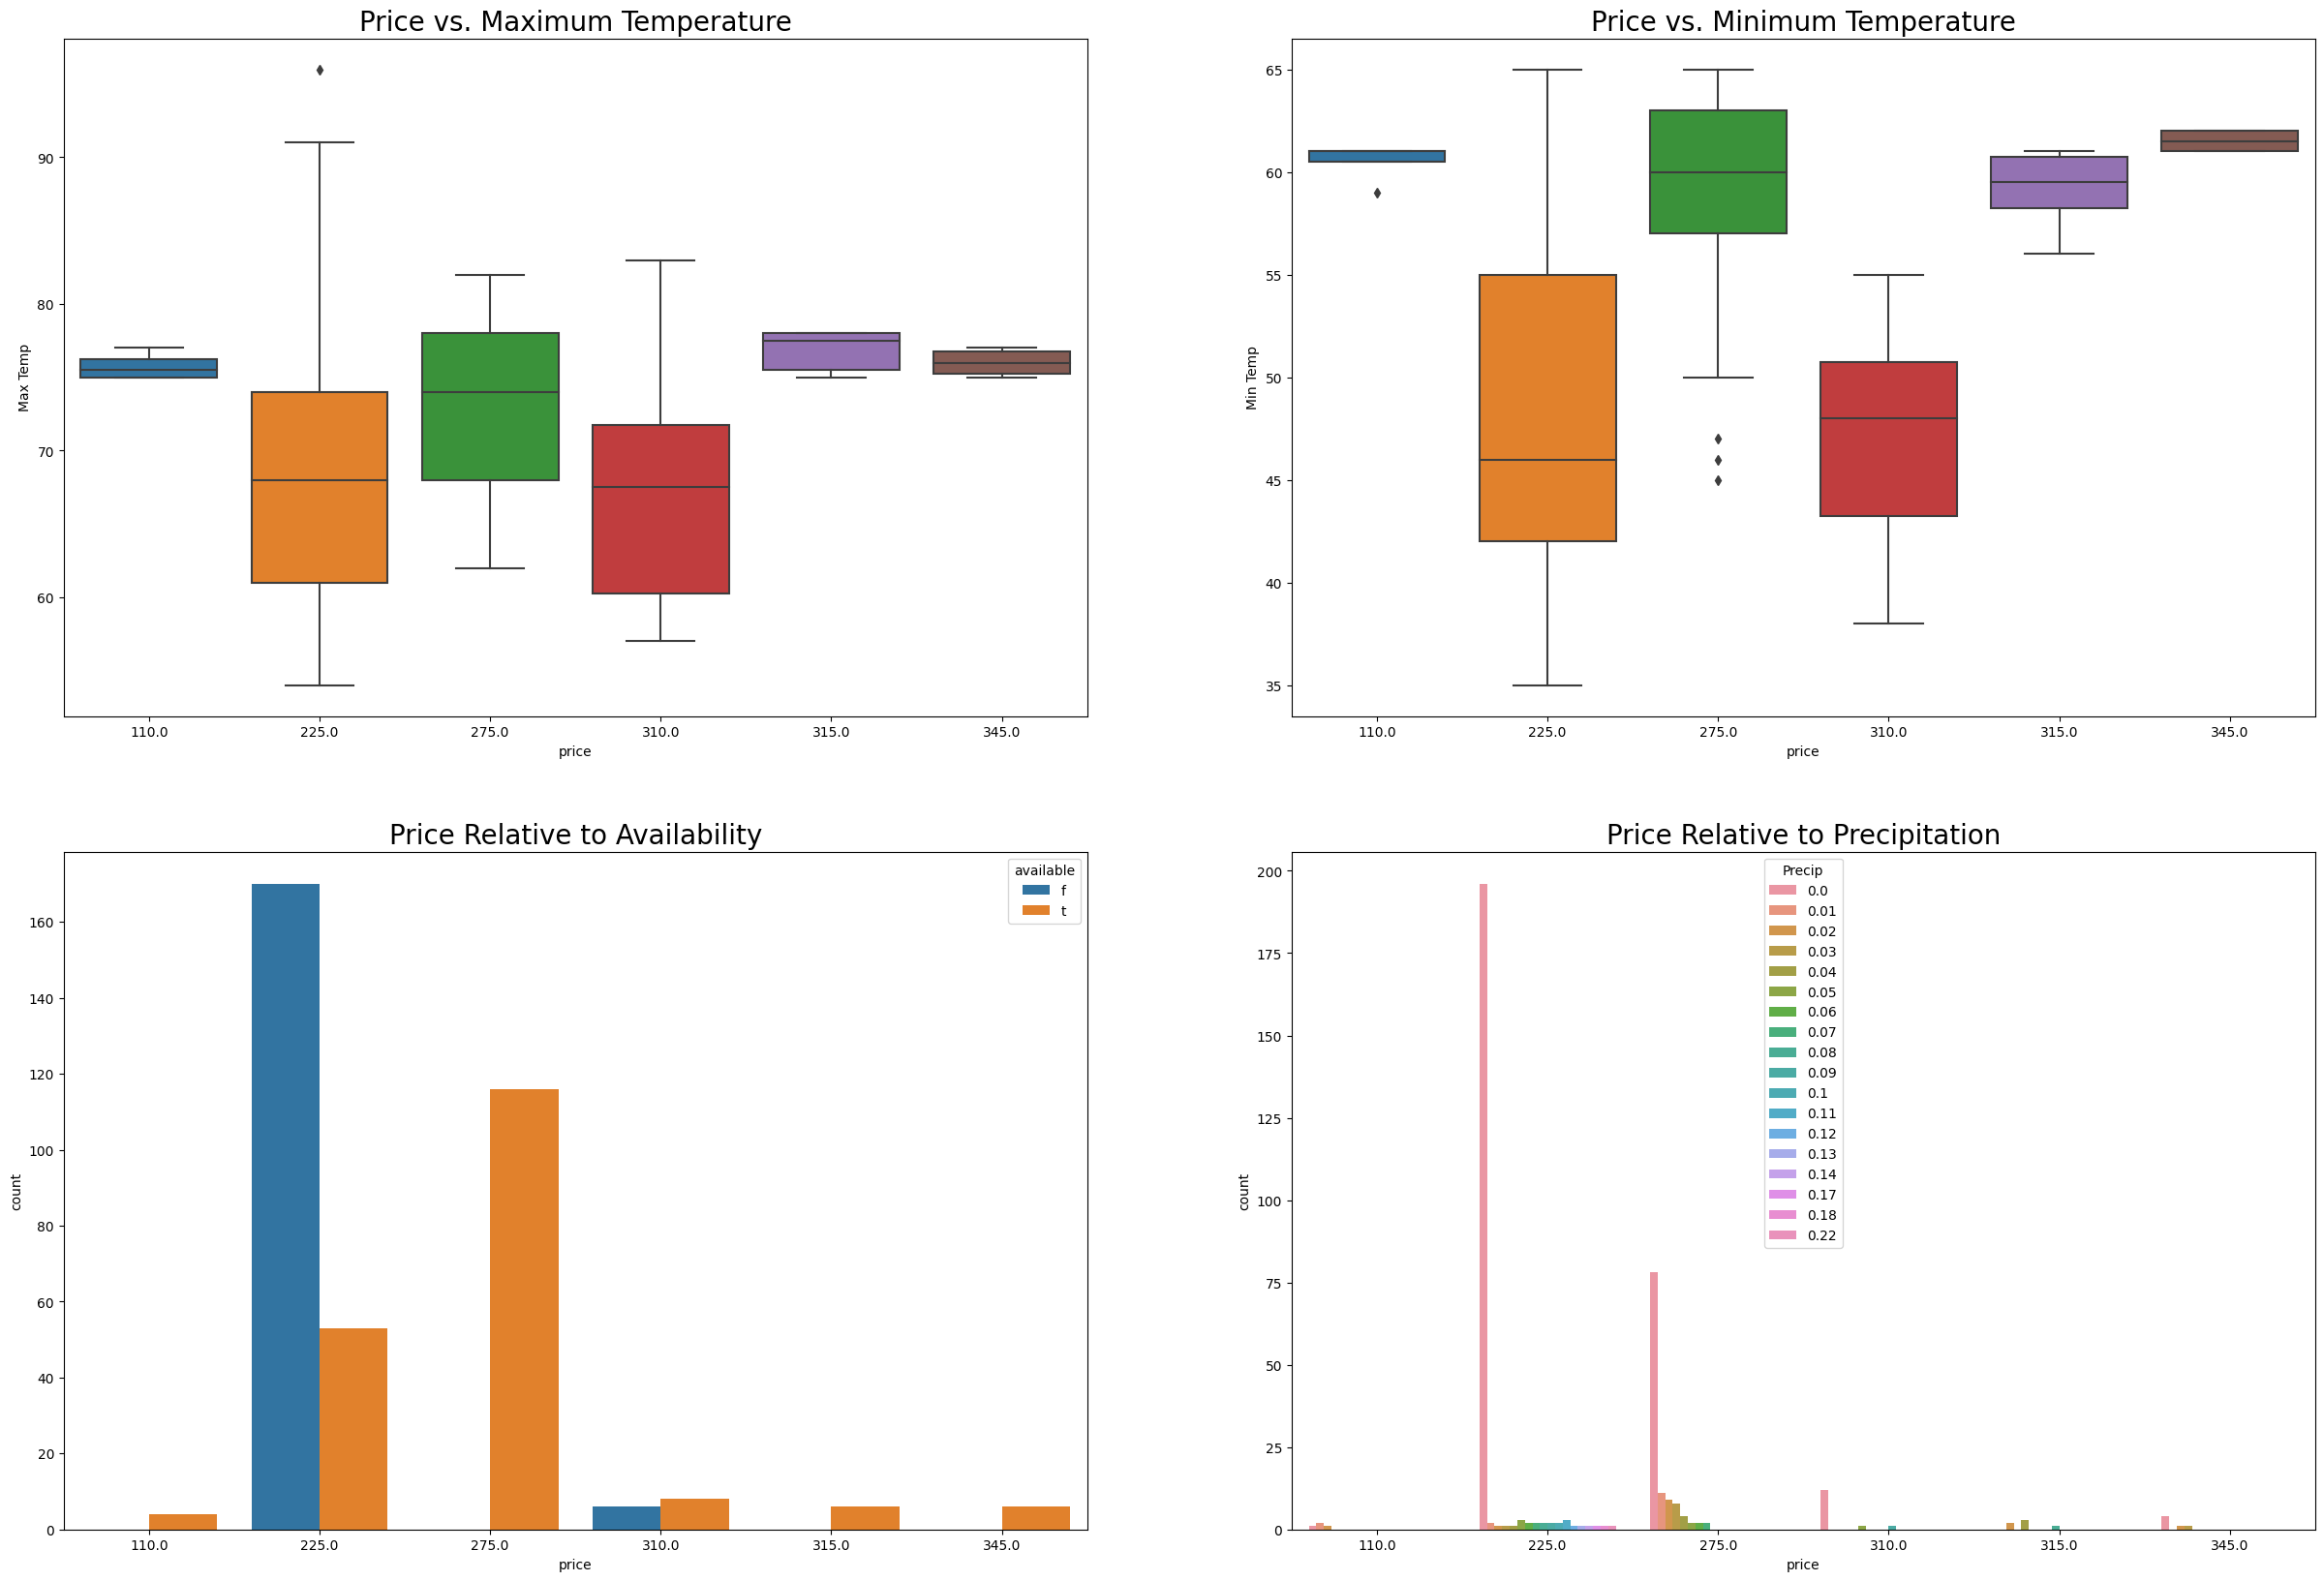

In [326]:

fig, ax = plt.subplots(2, 2, figsize=(30, 20))
ax = ax.flatten()
print(ax)


sns.boxplot(data=final_df,x= "price",y = "Max Temp", ax=ax[0])
sns.boxplot(data=final_df,x= "price",y = "Min Temp",ax=ax[1])
sns.countplot(data=final_df,x= "price", hue = "available",ax=ax[2])
sns.countplot(data=final_df,x= "price",hue = "Precip",ax=ax[3])

ax[0].set_title("Price vs. Maximum Temperature", fontdict = {"fontsize": 20})
ax[1].set_title("Price vs. Minimum Temperature", fontdict = {"fontsize": 20})
ax[2].set_title("Price Relative to Availability", fontdict = {"fontsize": 20})
ax[3].set_title("Price Relative to Precipitation", fontdict = {"fontsize": 20})


[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


Text(0.5, 1.0, 'Review Score Communication Count')

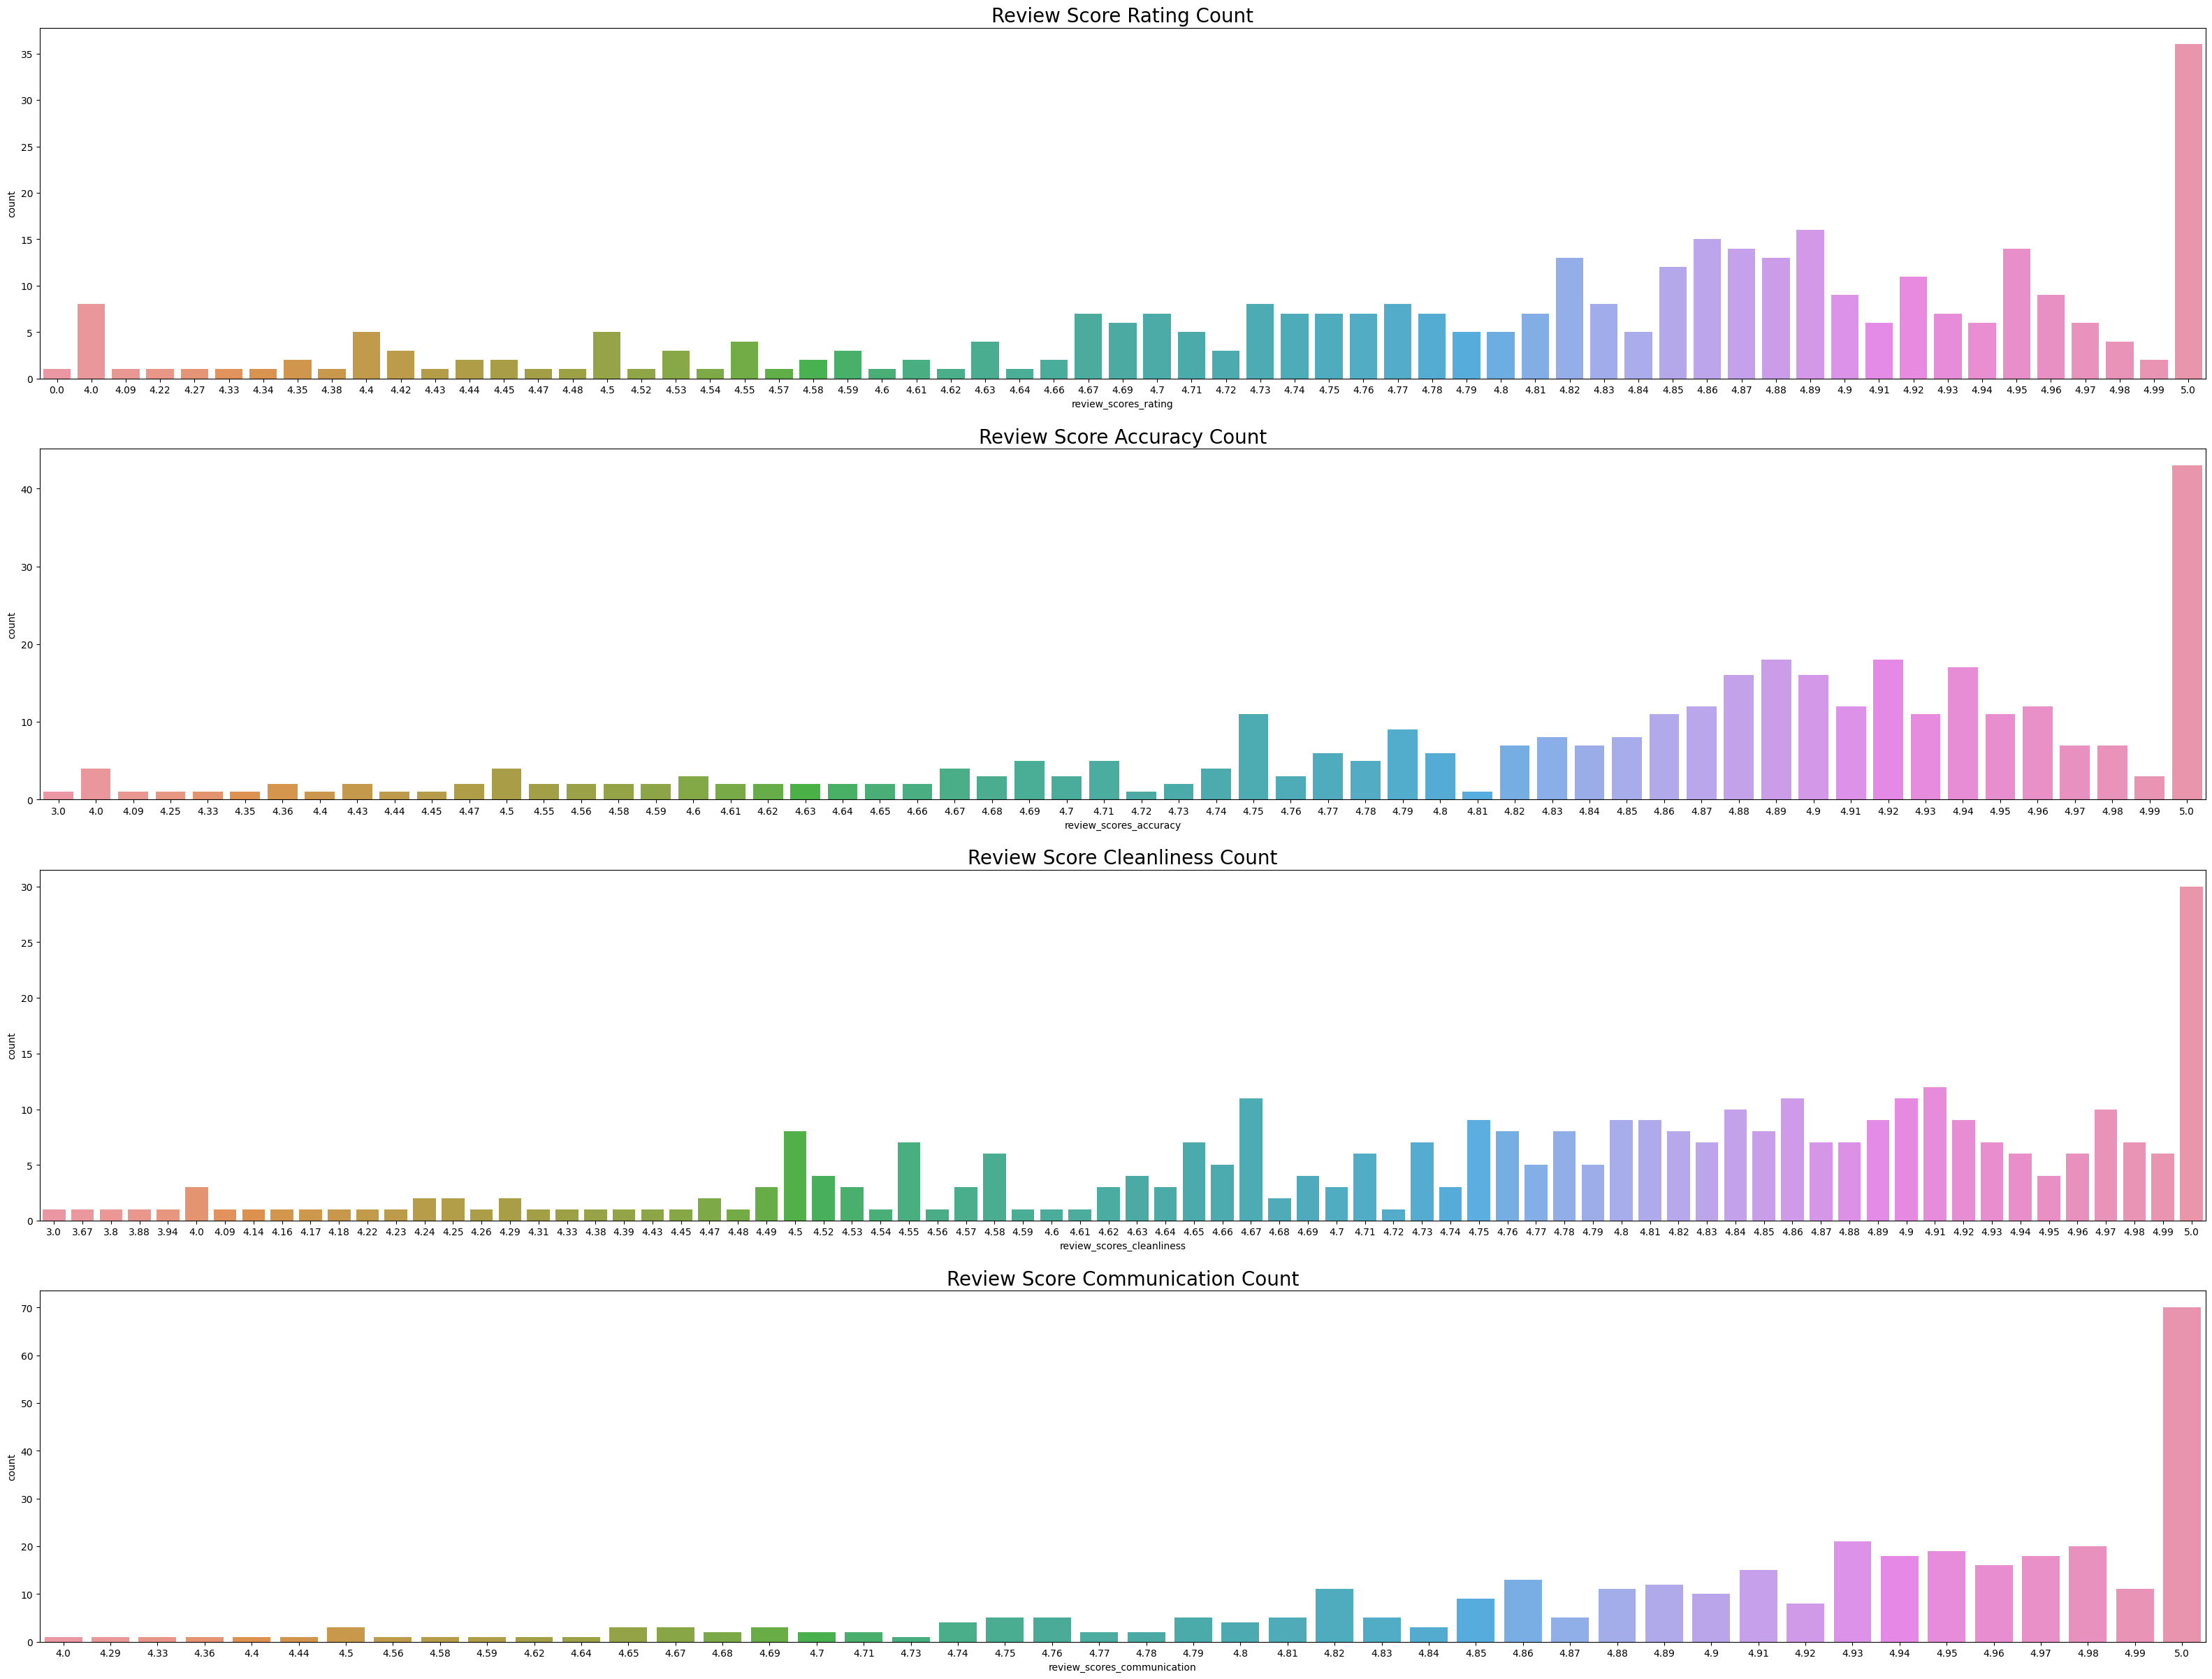

In [336]:
fig, ax = plt.subplots(4, 1, figsize=(40, 30))
ax = ax.flatten()
print(ax)


sns.countplot(data=final2_df,x= "review_scores_rating", ax=ax[0])
sns.countplot(data=final2_df,x= "review_scores_accuracy",ax=ax[1])
sns.countplot(data=final2_df,x= "review_scores_cleanliness",ax=ax[2])
sns.countplot(data=final2_df,x= "review_scores_communication",ax=ax[3])

ax[0].set_title("Review Score Rating Count", fontdict = {"fontsize": 20})
ax[1].set_title("Review Score Accuracy Count", fontdict = {"fontsize": 20})
ax[2].set_title("Review Score Cleanliness Count", fontdict = {"fontsize": 20})
ax[3].set_title("Review Score Communication Count", fontdict = {"fontsize": 20})

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


Text(0.5, 1.0, 'Host Acceptance Rate for Superhost')

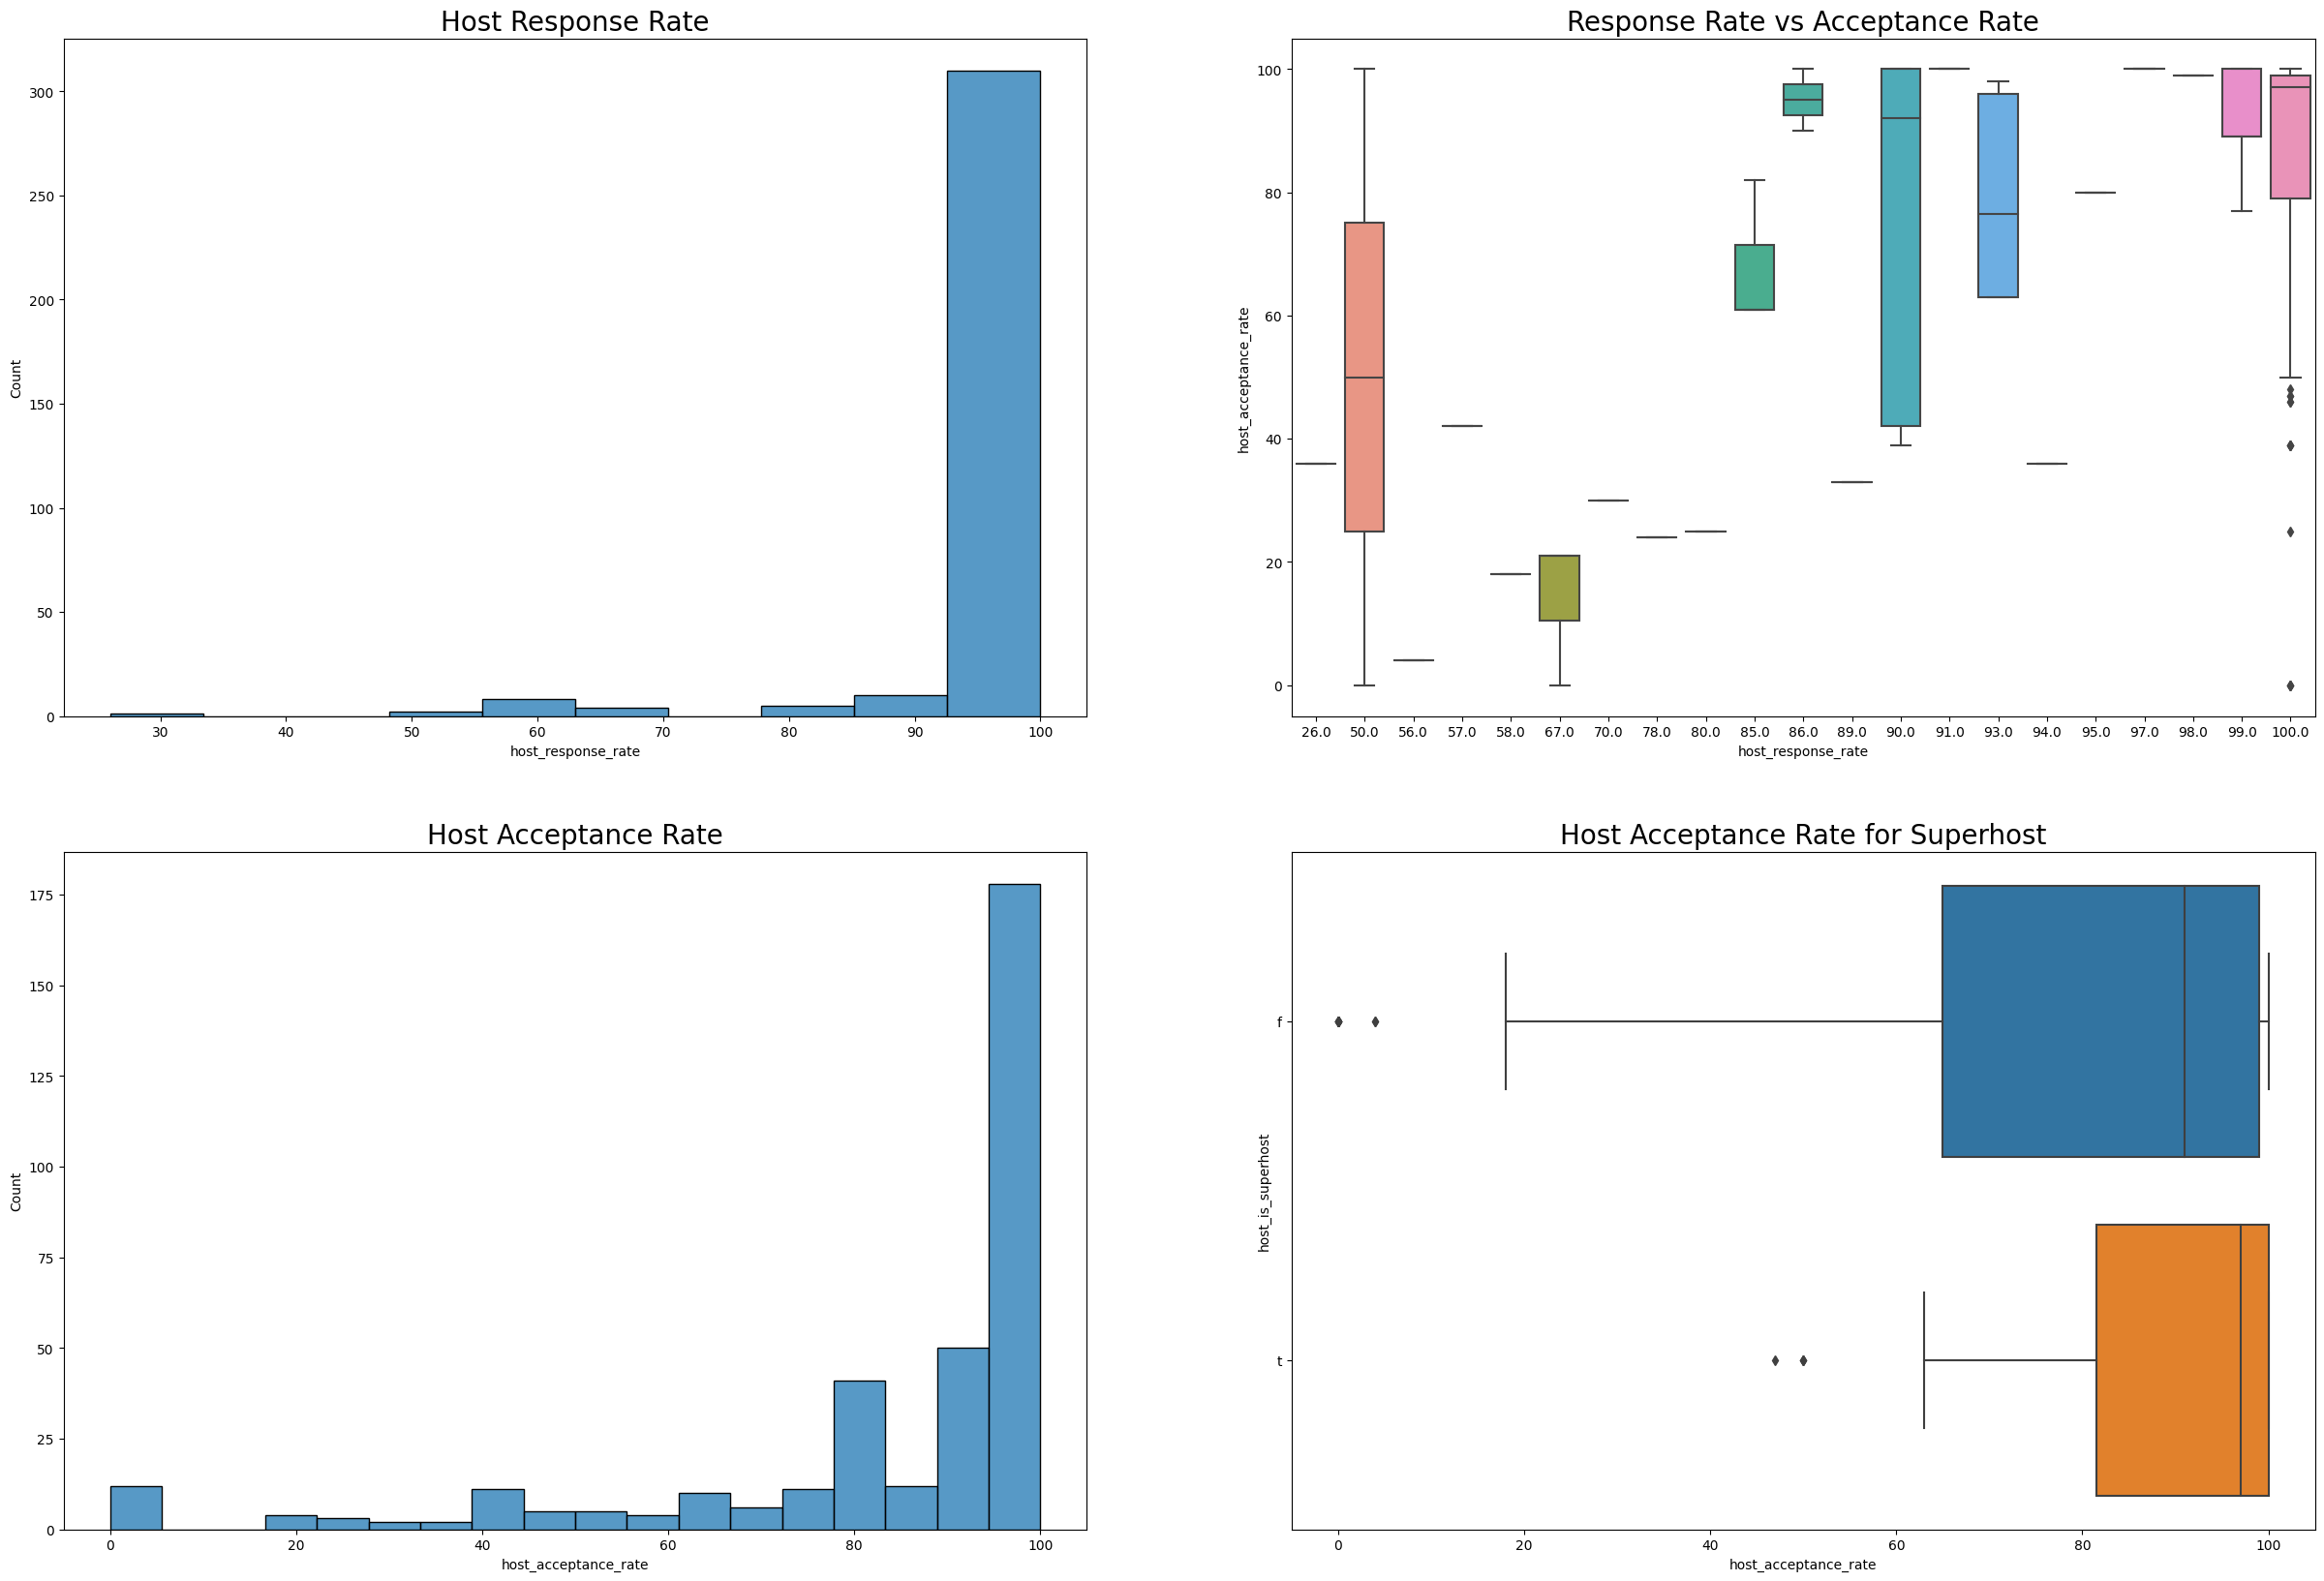

In [363]:
fig, ax = plt.subplots(2, 2, figsize=(30,20))
ax = ax.flatten()
print(ax)


sns.histplot(data=final2_df,x = "host_response_rate", ax=ax[0])
sns.boxplot(data=final2_df,x= "host_response_rate",y = "host_acceptance_rate",ax=ax[1])
sns.histplot(data=final2_df,x = "host_acceptance_rate", ax=ax[2])
sns.boxplot(data=final2_df,x= "host_acceptance_rate", y = "host_is_superhost",ax=ax[3])
#sns.countplot(data=final_df,x= "price",hue = "Precip",ax=ax[3])

ax[0].set_title("Host Response Rate", fontdict = {"fontsize": 20})
ax[1].set_title("Response Rate vs Acceptance Rate", fontdict = {"fontsize": 20})
ax[2].set_title("Host Acceptance Rate", fontdict = {"fontsize": 20})
ax[3].set_title("Host Acceptance Rate for Superhost", fontdict = {"fontsize": 20})

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


Text(0.5, 1.0, 'Availability for Superhosts')

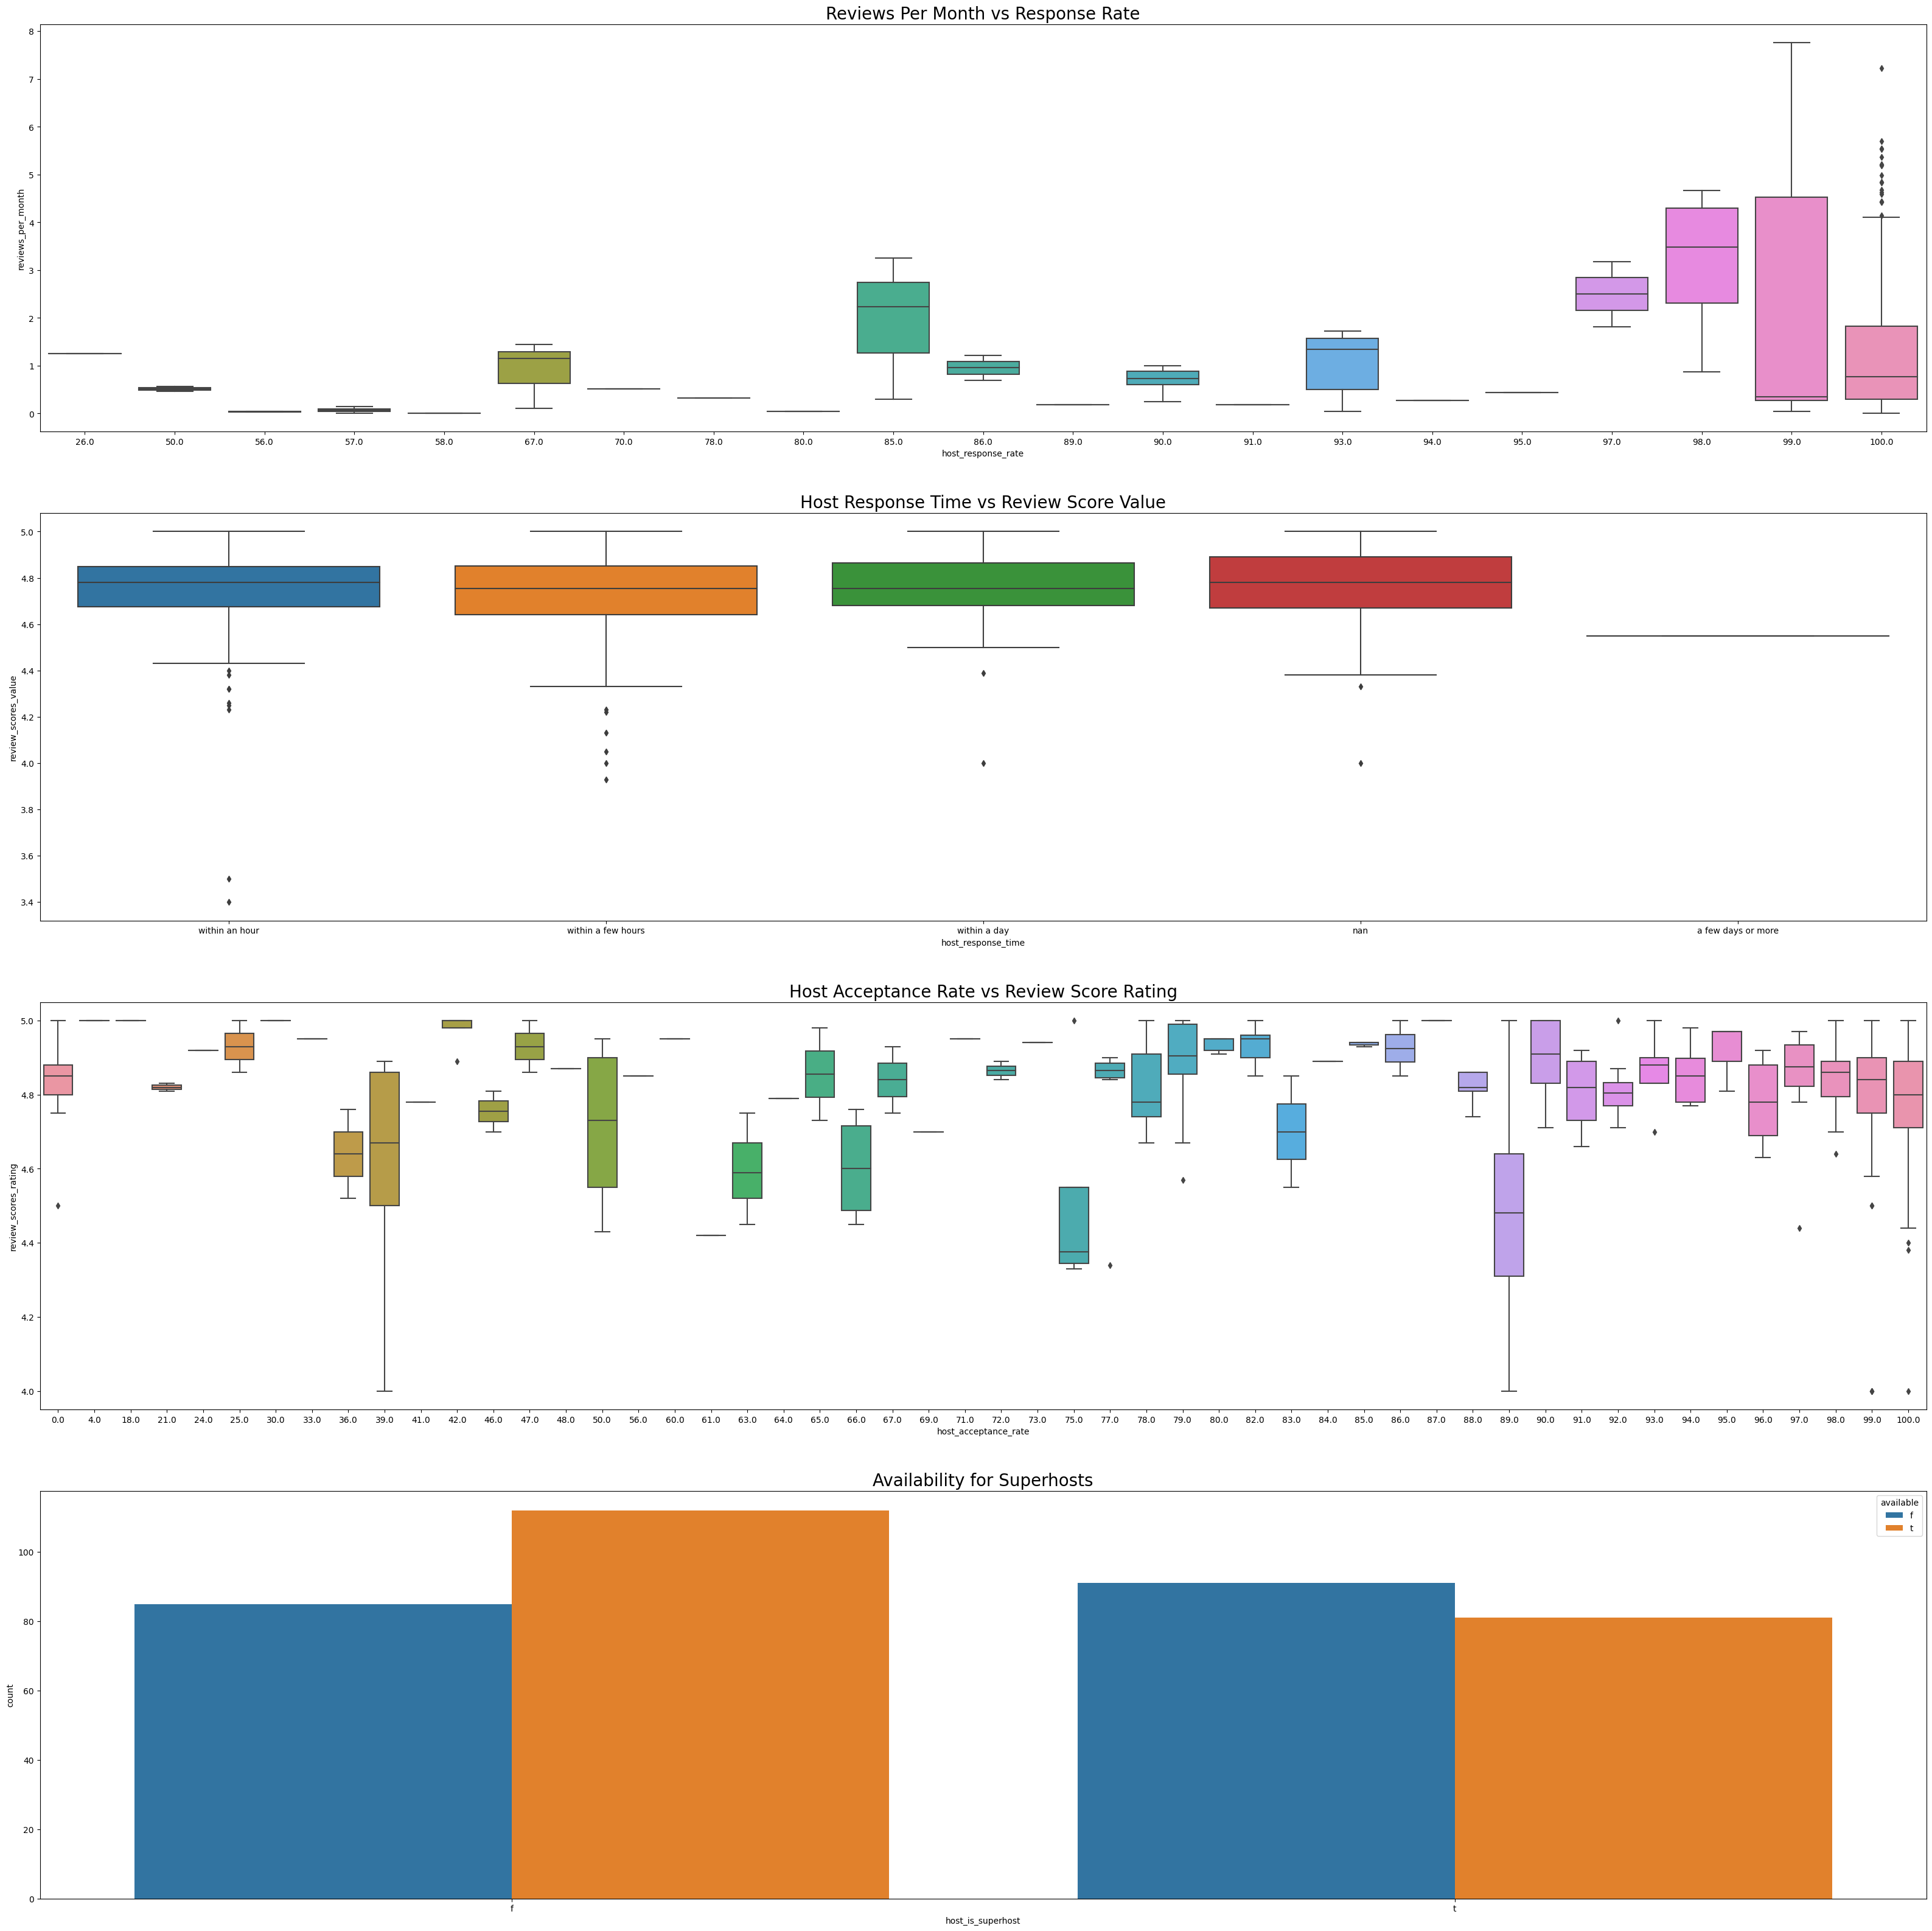

In [373]:
fig, ax = plt.subplots(4, 1, figsize=(40,40))
ax = ax.flatten()
print(ax)


sns.boxplot(data=final2_df,x = "host_response_rate", y = "reviews_per_month", ax=ax[0])
sns.boxplot(data=final2_df,x= "host_response_time",y = "review_scores_value", ax=ax[1])
sns.boxplot(data=final2_df,x= "host_acceptance_rate", y = "review_scores_rating",ax=ax[2])
sns.countplot(data=final2_df,x= "host_is_superhost",hue = "available",ax=ax[3])

ax[0].set_title("Reviews Per Month vs Response Rate", fontdict = {"fontsize": 20})
ax[1].set_title("Host Response Time vs Review Score Value", fontdict = {"fontsize": 20})
ax[2].set_title("Host Acceptance Rate vs Review Score Rating", fontdict = {"fontsize": 20})
ax[3].set_title("Availability for Superhosts", fontdict = {"fontsize": 20})

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


Text(0.5, 1.0, 'Review Score Rating Per Room Type')

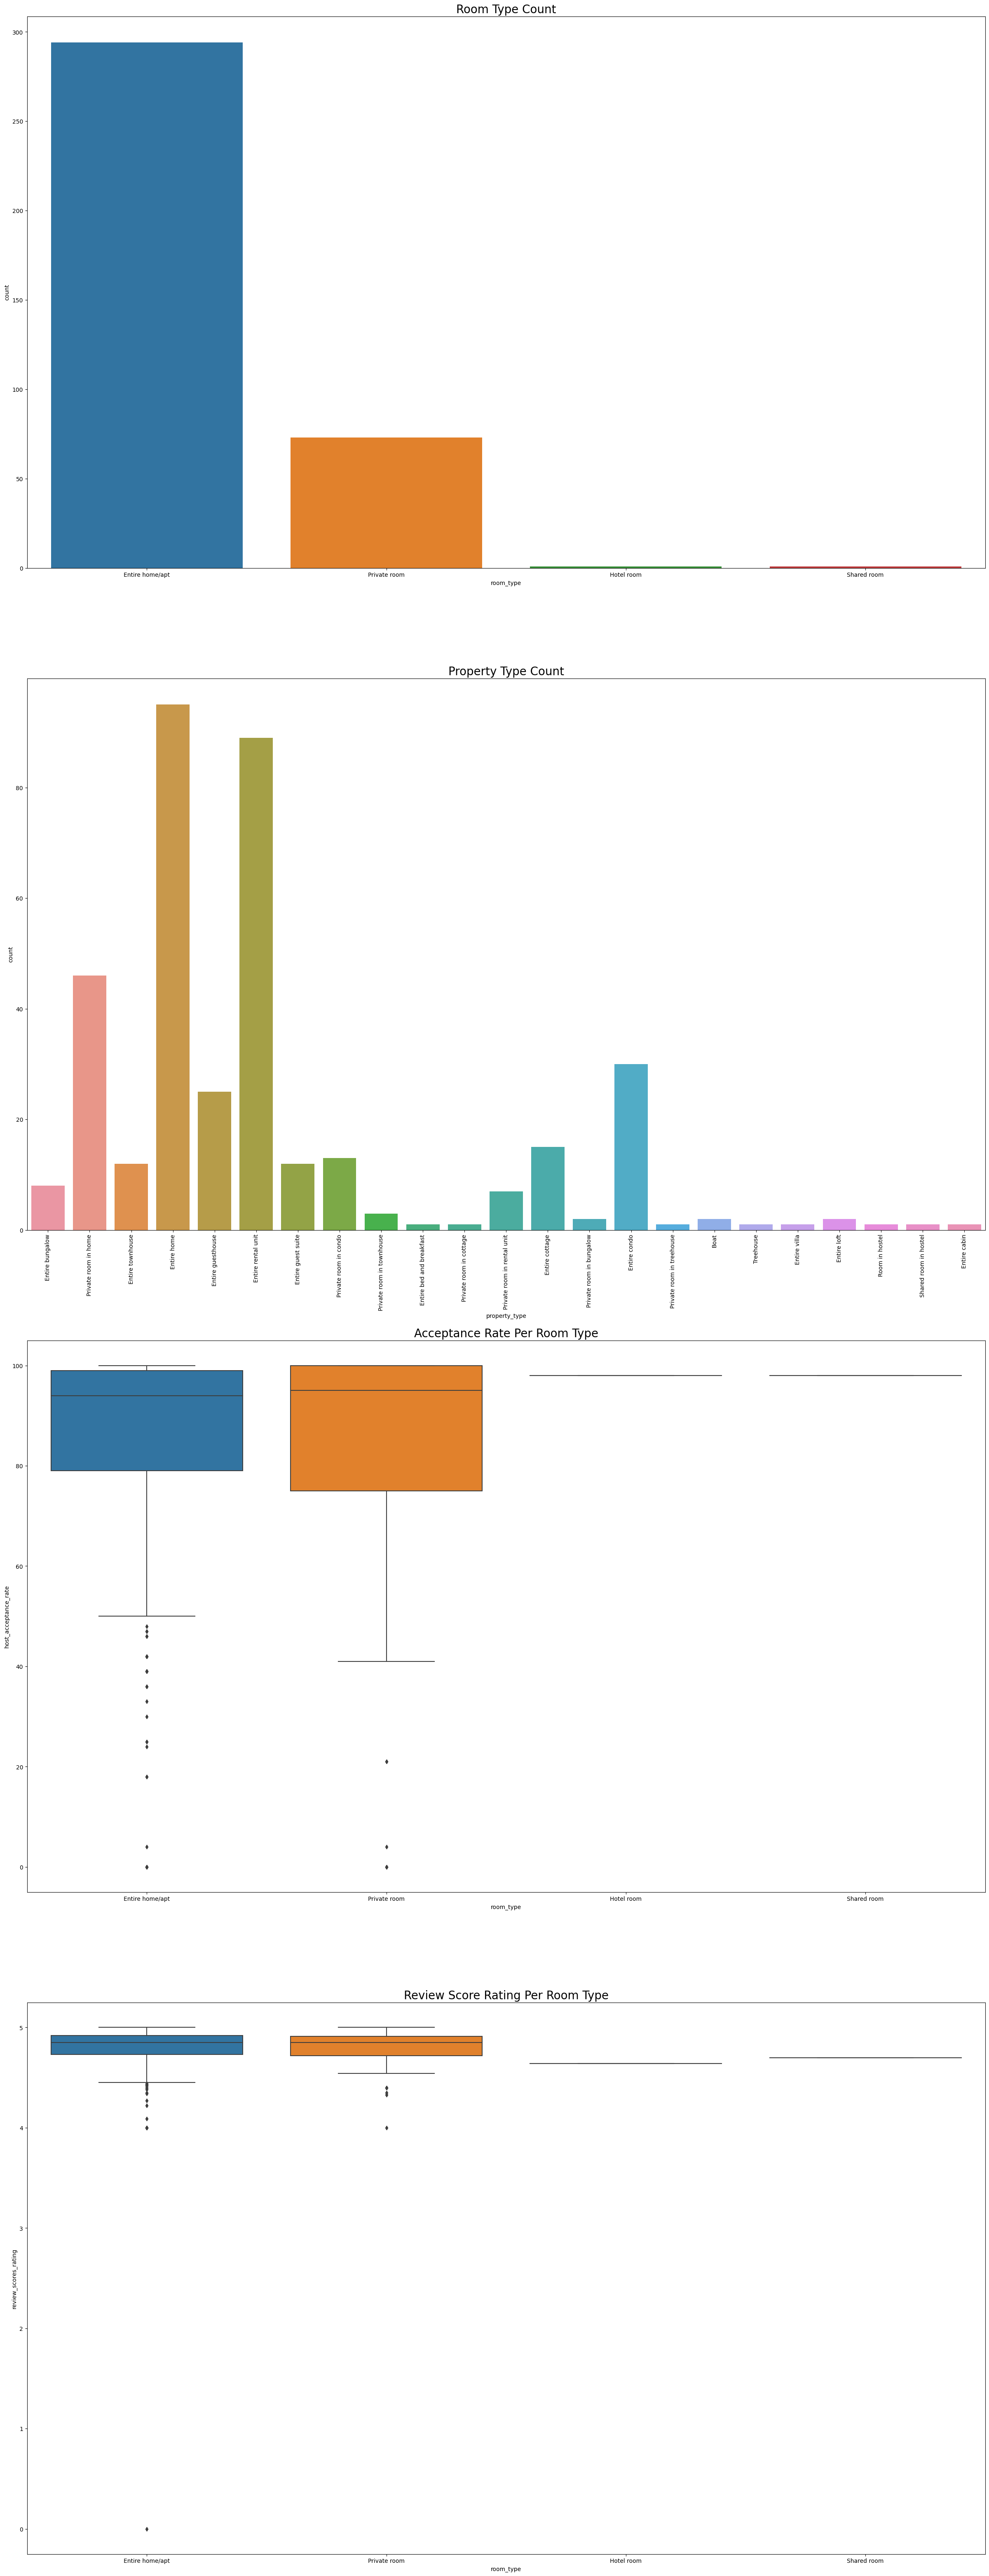

In [398]:
fig, ax = plt.subplots(4, 1, figsize=(30,80))
ax = ax.flatten()
print(ax)


sns.countplot(data=final2_df,x = "room_type", ax=ax[0])
sns.countplot(x = final2_df["property_type"], ax=ax[1])
sns.boxplot(data=final2_df,x = "room_type", y = "host_acceptance_rate", ax=ax[2])
sns.boxplot(data=final2_df,x= "room_type", y = "review_scores_rating",ax=ax[3])
#sns.countplot(data=final2_df,x= "host_is_superhost",hue = "available",ax=ax[3])

ax[0].set_title("Room Type Count", fontdict = {"fontsize": 20})
ax[1].set_title("Property Type Count", fontdict = {"fontsize": 20})
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[2].set_title("Acceptance Rate Per Room Type", fontdict = {"fontsize": 20})
ax[3].set_title("Review Score Rating Per Room Type", fontdict = {"fontsize": 20})